# statistics - Z tests
- a Z-test in Python involves using statistical libraries, primarily statsmodels or scipy.stats. The Z-test is suitable when the sample size is large (typically > 30) or the population standard deviation is known.
- statsmodels.stats.weightstats.ztest  (1S)
- 

In [16]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
import math

## Q1 : 1 Sample
- a random sample of 900 members has a mean of 3.4 cms. Can it reasonably regarded as a sample from a large population of mean 3.25 cms and std deviation 2.61 cm
- samples=900, sample_mean=3.4, pop_mean=3.25, pop_std = 2.61
- Step 1: Hypotheses
- H0: sm  = 3.25 (sample comes from the population)
- H1: sm !=3.25 (sample does not come from the population)}
- ztest(data, value=mu) compares the sample mean of data to the hypothesized population mean mu.
- It assumes known or large-sample variance, approximating a z-test.

In [13]:
#help(ztest)

In [9]:
# Given data
xbar = 3.4
mu = 3.25
sigma = 2.61
n = 900

In [12]:
# generate data
data = np.random.normal(loc=xbar, scale=sigma, size=n)
data[0:5]

array([7.51198559, 5.31628002, 4.27521987, 3.39914765, 2.44954735])

In [11]:
# Perform one-sample z-test
z_stat, p_value = ztest(data, value=mu)
print("Z-statistic:", z_stat)
print("p-value:", p_value)

Z-statistic: 1.2608382954163515
p-value: 0.20736711329292368


## Use sigma directly
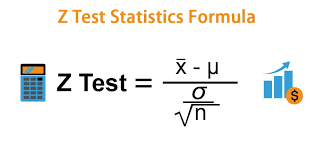
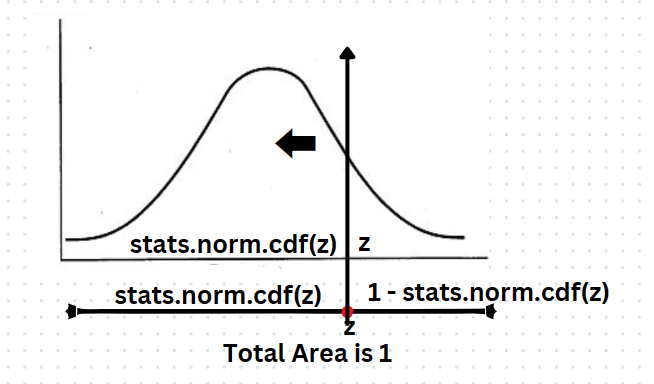

In [17]:
from scipy.stats import norm
z_stat = (xbar - mu) / (sigma / math.sqrt(n))
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print("Z-statistic:", z_stat)
print("p-value:", p_value)

Z-statistic: 1.7241379310344818
p-value: 0.08468294595757864


In [18]:
#Here, p ≈ 0.084 ⇒ Fail to reject H₀ — the sample can reasonably come from the population (mean 3.25).

## Q2 : Statistics Marks
- The average marks in statistics of sample of 100 students were 51 with std dev of 6 marks.
- Could this have been a random sample from a population with average marks 50
- We’re testing whether a sample with mean = 51, std = 6, and n = 100 could have come from a population mean = 50.
- That’s a one-sample Z-test (since population standard deviation is known or large n)
- Hypothesis : Ho: mu=50 ; Ha : mu != 50  (Two Tailed)

In [19]:
# Given values
xbar = 51
mu0 = 50
sigma = 6
n = 100

In [20]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# Simulated data (since ztest needs raw data)
data = np.random.normal(loc=xbar, scale=sigma, size=n)

z_stat, p_val = ztest(data, value=mu0)
print("Z:", round(z_stat, 3), "p-value:", round(p_val, 4))

Z: 3.754 p-value: 0.0002


- pvalue > .02 : Do not reject Ho : 
- The sample can reasonably be regarded as coming from a population with mean marks = 50.ie mu0
- The difference between the sample mean (51) and population mean (50) is not statistically significant at 5% level.

In [22]:
from scipy.stats import norm
# Z-statistic
z = (xbar - mu0) / (sigma / math.sqrt(n))
print("Z statistic:", round(z, 3))

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))
print("p-value:", round(p_value, 4))

Z statistic: 1.667
p-value: 0.0956


## Q3 Testing Difference between 2 population means
- A college conducted both day and night classes intended to be identical.
- A sample of 100 day students yields examination results as under : mu1 = 72.4, s1 = 14.8
- A sample of 200 night students yields examination reults as under : mu2 = 73.9, s2 = 17.9
- Are the 2 means statistically equal at 5% level
- Two tailed Test
    - Ho : mu1 = mu2 ; Ha : mu1 != mu2
    - 

In [23]:
import math
from scipy.stats import norm
n1, x1, s1 = 100, 72.4, 14.8 #sample1
n2, x2, s2 = 200, 73.9, 17.9 #sample2

In [24]:
print(n1, x1, s1)
print(n2, x2, s2)

100 72.4 14.8
200 73.9 17.9


In [26]:
se  = math.sqrt(s1**2/n1 + s2**2/n2)
z   = (x1 - x2) / se
p   = 2 * (1 - norm.cdf(abs(z)))        # two-tailed p-value

# 95% CI for (mu1 - mu2)
zcrit = 1.96
diff  = x1 - x2
ci    = (diff - zcrit*se, diff + zcrit*se)

print(f"Z = {z:.3f}, p = {p:.3f}, diff = {diff:.1f}, 95% CI = [{ci[0]:.3f}, {ci[1]:.3f}]")

Z = -0.770, p = 0.441, diff = -1.5, 95% CI = [-5.317, 2.317]


- At the 5% level, fail to reject Ho. 
- The day and night class means are not statistically different.

## End of Z Tests